In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [4]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion', 'hack_license',
                          'pickup_hour', 'pickup_day_of_week', 'pickup_day_of_month',
                          'tip_amount', 'fare_amount'
                          
                         ])

df.head()

,medallion,hack_license,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,6.0,1.0,15,25,Monday
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,5.5,3.0,15,25,Monday
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,15.0,2.0,9,25,Monday
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,14.0,2.9,6,25,Monday
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,12.0,2.0,10,25,Monday


# Is it possible to characterise taxi drivers based on work hours and how much they make?

In [16]:
# let's put pickup_hour into groups

pickup_hour_bins = [-1, 5, 11, 17, 23]
pickup_hour_labels = ["12am to 5:59am", "6am to 11:59", "12pm to 5:59pm", "6pm to 11:59pm"]

df["pickup_hour_bin"] = pd.cut(df['pickup_hour'], bins=pickup_hour_bins, labels=pickup_hour_labels).astype(str)

df.head()

,medallion,hack_license,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week,pickup_hour_bin,driver_earnings
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,6.0,1.0,15,25,Monday,12pm to 5:59pm,7.0
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,5.5,3.0,15,25,Monday,12pm to 5:59pm,8.5
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,15.0,2.0,9,25,Monday,6am to 11:59,17.0
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,14.0,2.9,6,25,Monday,6am to 11:59,16.9
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,12.0,2.0,10,25,Monday,6am to 11:59,14.0


In [17]:
# work out what shift each driver did the most trips in
driver_shift_worked_per_day = df[['hack_license', 'pickup_hour_bin']].value_counts().reset_index()

driver_shift_worked_per_day['most_common_shift'] = driver_shift_worked_per_day.groupby(['hack_license'])['count'].rank(method="first", ascending=False)

driver_shift_worked_per_day = driver_shift_worked_per_day.loc[driver_shift_worked_per_day['most_common_shift']==1]

# driver_shift_worked_per_day = driver_shift_worked_per_day[driver_shift_worked_per_day['count'] > 30] # only keep drivers who did at least 1 trip per day on average

driver_shift_worked_per_day


,hack_license,pickup_hour_bin,count,most_common_shift
0,E76F8763F39B8B209929FB76E6CDE996,6pm to 11:59pm,640,1.0
1,633FD5F71950A5E416005E05A033F9AE,6pm to 11:59pm,605,1.0
2,DF6B82EB71CC9CBBBFFBF9D51E2B6297,6pm to 11:59pm,602,1.0
3,A6C8B96091DC43732F4AA71601AAF234,6pm to 11:59pm,602,1.0
4,8A717131CE5BA9080F9A28409D76C052,6pm to 11:59pm,601,1.0
...,...,...,...,...
103297,66EC95AACBB9AF6F1EFAECC8DDC1082F,6pm to 11:59pm,1,1.0
103350,D82C8D1619AD8176D665453CFB2E55F0,12pm to 5:59pm,1,1.0
103355,FFD52F3C7E12435A724A8F30FDDADD9C,12pm to 5:59pm,1,1.0
103367,F275D3515904EF43DA682B036C211ABC,12pm to 5:59pm,1,1.0


In [20]:
driver_shift_worked_per_day['pickup_hour_bin'].value_counts()

pickup_hour_bin
6pm to 11:59pm    15767
6am to 11:59       9545
12pm to 5:59pm     7272
12am to 5:59am      421
Name: count, dtype: int64

In [21]:
# calculate earnings per trip by summing fare and tip
df['driver_earnings'] = df['fare_amount'] + df['tip_amount']
df.head()

,medallion,hack_license,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week,pickup_hour_bin,driver_earnings
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,6.0,1.0,15,25,Monday,12pm to 5:59pm,7.0
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,5.5,3.0,15,25,Monday,12pm to 5:59pm,8.5
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,15.0,2.0,9,25,Monday,6am to 11:59,17.0
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,14.0,2.9,6,25,Monday,6am to 11:59,16.9
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,12.0,2.0,10,25,Monday,6am to 11:59,14.0


In [22]:
earnings_per_driver = df.groupby('hack_license')['driver_earnings'].sum().reset_index()
earnings_per_driver

,hack_license,driver_earnings
0,0002555BBE359440D6CEB34B699D3932,6679.92
1,0006C8F9279EFD18D8E70193D98499CB,6295.75
2,0008B3E338CE8C3377E071A4D80D3694,7777.32
3,000B8D660A329BBDBF888500E4BD8B98,7212.27
4,000C15EFBDF58CAED528C09E597484EC,2059.67
...,...,...
33000,FFF657CFEC6A06384C97ACB500916913,4616.38
33001,FFF909B1353148850AD3E40BB878618B,4308.72
33002,FFFBCEA3D4E21E05902EE67AD556F67C,11243.97
33003,FFFC8985B6B37B60AE71741C01AC423A,1238.05


In [23]:
hack_license_common_shift_total_earnings = pd.merge(left=driver_shift_worked_per_day, right=earnings_per_driver, on='hack_license', how='left')

hack_license_common_shift_total_earnings

,hack_license,pickup_hour_bin,count,most_common_shift,driver_earnings
0,E76F8763F39B8B209929FB76E6CDE996,6pm to 11:59pm,640,1.0,10520.38
1,633FD5F71950A5E416005E05A033F9AE,6pm to 11:59pm,605,1.0,9877.67
2,DF6B82EB71CC9CBBBFFBF9D51E2B6297,6pm to 11:59pm,602,1.0,10629.04
3,A6C8B96091DC43732F4AA71601AAF234,6pm to 11:59pm,602,1.0,12530.69
4,8A717131CE5BA9080F9A28409D76C052,6pm to 11:59pm,601,1.0,12163.27
...,...,...,...,...,...
33000,66EC95AACBB9AF6F1EFAECC8DDC1082F,6pm to 11:59pm,1,1.0,52.00
33001,D82C8D1619AD8176D665453CFB2E55F0,12pm to 5:59pm,1,1.0,24.00
33002,FFD52F3C7E12435A724A8F30FDDADD9C,12pm to 5:59pm,1,1.0,7.50
33003,F275D3515904EF43DA682B036C211ABC,12pm to 5:59pm,1,1.0,49.00


In [14]:
# average_fare_per_dropoff_hour = hack_license_common_shift_total_earnings.groupby('pickup_hour_bin')['driver_earnings'].mean().reset_index().rename(columns={'fare_amount': 'average_fare'})

# # create a subplot with12 rows and 1 columns
# fig, ax = plt.subplots(1,1, figsize=(15, 7))

# sns.barplot(data=average_fare_per_dropoff_hour,
#            x='dropoff_hour', y='average_fare',
#            color='#3557E2')

# # bars_0 = ax.containers[0]
# # ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# # plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

# ax.axes.set_title("Average fare amount per dropoff hour in November 2013",fontsize=20)
# ax.set_xlabel("Hour of day",fontsize=15)
# ax.set_ylabel("Average fare amount ",fontsize=15)

# ax.yaxis.set_tick_params(labelsize = 12);
# ax.xaxis.set_tick_params(labelsize = 12);

# plt.grid(True, color='black', linewidth=.1)

# plt.show()

In [25]:
data_for_plot

,pickup_hour_bin,avg_driver_earnings
0,12am to 5:59am,4115.138955
1,12pm to 5:59pm,5208.661570
2,6am to 11:59,5674.418346
3,6pm to 11:59pm,6225.274187


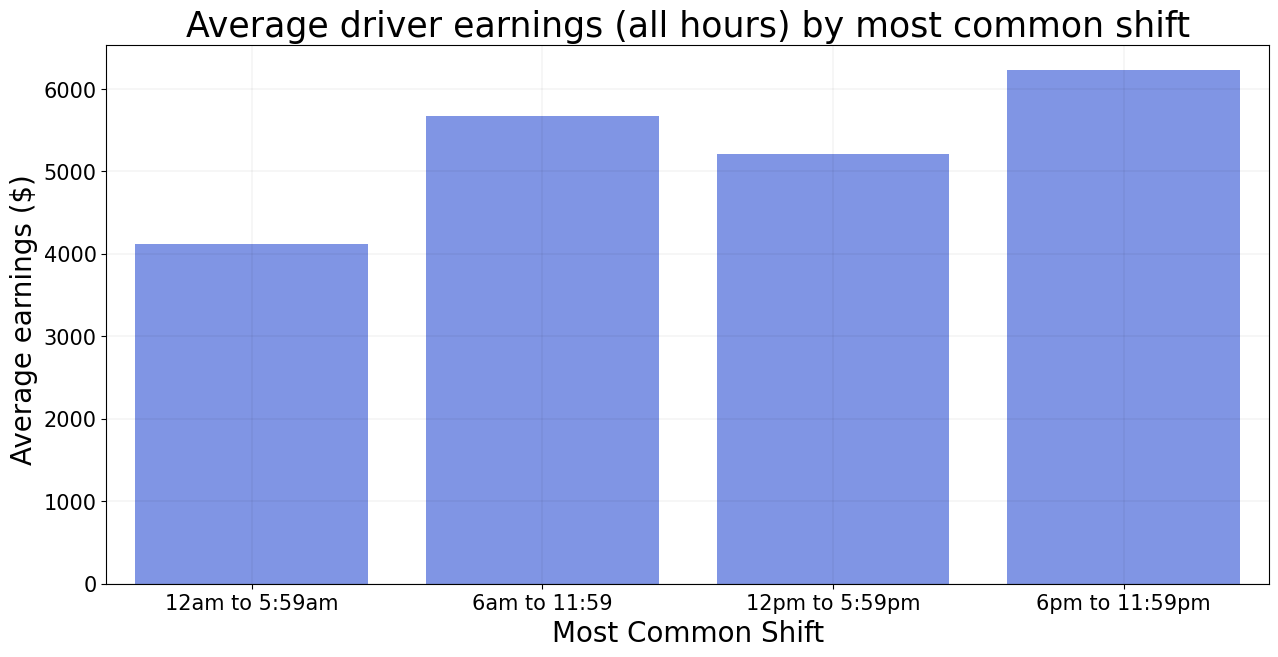

In [32]:
data_for_plot = hack_license_common_shift_total_earnings.groupby('pickup_hour_bin')['driver_earnings'].mean().reset_index().rename(
        columns={'driver_earnings': 'avg_driver_earnings'})

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=data_for_plot,
           x='pickup_hour_bin', 
            y='avg_driver_earnings',
            order=['12am to 5:59am', '6am to 11:59', '12pm to 5:59pm', '6pm to 11:59pm'],
           color='#6F8CF5')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average driver earnings (all hours) by most common shift",fontsize=25)
ax.set_xlabel("Most Common Shift",fontsize=20)
ax.set_ylabel("Average earnings ($) ",fontsize=20)

ax.yaxis.set_tick_params(labelsize = 15);
ax.xaxis.set_tick_params(labelsize = 15);

plt.grid(True, color='black', linewidth=.05)

plt.show()